In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from tqdm import tqdm_notebook as tqdm
from keras_tqdm import TQDMNotebookCallback as ktqdm
import os
import random
import tensorflow as tf
from keras.utils import print_summary

Using TensorFlow backend.


In [2]:
def plot(x_train, y_train, x_pred, y_pred, y_true):
    plt.plot(x_pred, y_true)
    plt.plot(x_train, y_train, "o")
    plt.plot(x_pred, y_pred)
    plt.show()

In [3]:
def sin(n:int):
    x = np.linspace(0,2*np.pi, num=n).reshape(-1, 1)
    y = np.sin(x)
    return x, y

In [4]:
def scale(train, test):
    scaler = MinMaxScaler().fit(train)
    return scaler, scaler.transform(train), scaler.transform(test)

In [5]:
def generate_holdout(x:np.ndarray, y:np.ndarray, test_size:float, random_state:int):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    return (*scale(x_train, x_test), *scale(y_train, y_test))

In [6]:
def mlp(breath:int, deapth:int):
    model = Sequential([
        Dense(1, input_shape=(1,), activation="relu"),
        *[
            Dense(breath, activation="relu") for i in range(deapth)
        ],
        Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer='nadam',
        loss='mean_squared_error',
        metrics=['accuracy']
    )
    return model

In [13]:
test_size = 0.3
validation_size = 0.1
random_state = 42
epochs_per_step = 5
steps = 5
batch_size = 16
breath, deapth = 50, 5

In [14]:
x, y = sin(30)
x_scaler, x_train, x_test, y_scaler, y_train, y_test = generate_holdout(x, y, test_size, random_state)

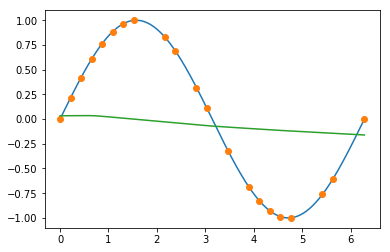

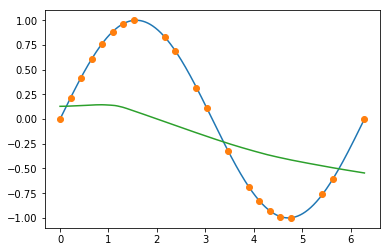

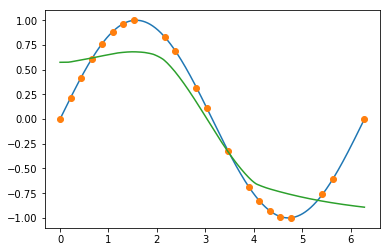

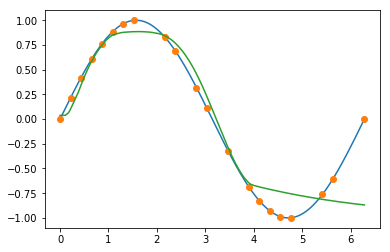

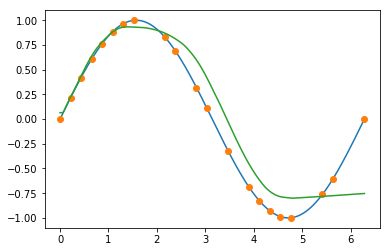

In [16]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)
tf.set_random_seed(42)

model = mlp(breath, deapth)
total_epochs = 0
for step in tqdm(range(steps)):
    model.fit(
        x_train,
        y_train,
        shuffle=True,
        verbose=0,
        #callbacks=[ktqdm(metric_format="{name}: {value:e}", leave_outer=False)],
        validation_data=(x_test, y_test),
        epochs=epochs_per_step+total_epochs*step,
        batch_size=batch_size,
        initial_epoch=total_epochs
    )
    x_wide = np.linspace(0,2*np.pi, num=1000).reshape(-1, 1)
    total_epochs+=epochs_per_step
    plot(
        x_scaler.inverse_transform(x_train),
        y_scaler.inverse_transform(y_train),
        x_wide,
        y_scaler.inverse_transform(model.predict(x_scaler.transform(x_wide))),
        np.sin(x_wide)
    )